In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("cs111-svm-dataset---sheet1.csv")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


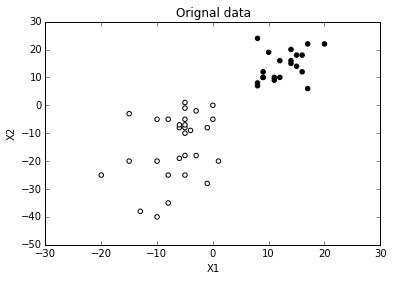

In [23]:
original = data.plot(x='X1', y='X2', kind="scatter", c='Classification', cmap='gray', colorbar=False, title='Orignal data')

In [12]:
import math
def dm1(x1, x2, y, m1, m2, b):
    A = np.exp(-y * (m1 * x1 + m2 * x2 + b))
    return np.mean(-y * x1 * A * (1 / (1 + A)))

def dm2(x1, x2, y, m1, m2, b):
    A = np.exp(-y * (m1 * x1 + m2 * x2 + b))
    return np.mean(-y * x2 * A * (1 / (1 + A)))

def db(x1, x2, y, m1, m2, b):
    A = np.exp(-y * (m1 * x1 + m2 * x2 + b))
    return np.mean(-y * A * (1 / (1 + A)))

In [120]:
x1 = data['X1'].values
x2 = data['X2'].values
y = data['Classification'].values
y[y == 0] = -1

In [124]:
m1p, m2p, bp = 0, 0, 0 #empty value for iteration purpose
m1, m2, b = 0.5, 0.5, 1 #init
alpha = 0.1
precision = 0.00001

In [125]:
steps = 0
while abs(m1 - m1p) > precision or abs(m2 - m2p) > precision or abs(b - bp) > precision:
    m1p, m2p, bp = m1, m2, b
    m1t = m1 - alpha * dm1(x1, x2, y, m1, m2, b)
    m2t = m2 - alpha * dm2(x1, x2, y, m1, m2, b)
    bt = b - alpha * db(x1, x2, y, m1, m2, b)
    m1, m2, b = m1t, m2t, bt
    steps += 1
    
print(m1, m2, b, steps)

-1.21622381782 -1.07049314068 5.30682800667 99435


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


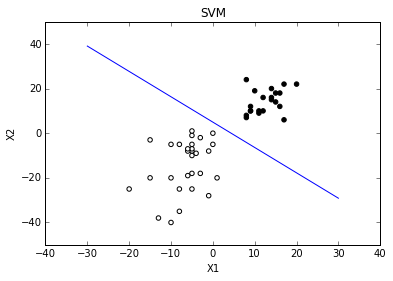

In [126]:
def getx2_by_fx(x1, m1, m2, b):
    #assume f(x1, x2) = 0
    return (m1 * x1 + b) / -m2
hypo_x1 = np.linspace(-30, 30, 20)
line = getx2_by_fx(hypo_x1, m1, m2, b)
plt.plot(hypo_x1, line)
plt.scatter(x1, x2, c=y, cmap='gray')
plt.title("SVM")
plt.xlabel("X1")
plt.ylabel("X2")